In [3]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup

In [4]:
url = 'https://www.inc.com/rest/i5list/2020'
resp = requests.get(url).json()

#Only get company data
df = pd.DataFrame(resp['companies'])

#Drop columns with no data
df = df.dropna(axis=1, how='all')
#Drop unneeded data
df = df.drop(columns=['ifc_filelocation', 'article', 'icon'])

#Note that there are 4 companies that are "tied" at 32nd, 428th, 448th, and 2979th (though growth percentages differ in every case)
# df['rank'].value_counts(dropna=False)

In [5]:
df.head()

,inc5000companyId,inc5000yearId,rank,company,workers,previous_workers,ceo_gender,website,state_s,state_l,...,zipcode,founded,ifc_business_model,ifc_business_description,ifc_paid_business_description,ifc_verified_companyflag,raw_revenue,raw_revenue_previous,yrs_on_list,editorsPick
0,107609,193361,1,OneTrust,1152,38,Male,http://onetrust.com,GA,Georgia,...,30328.0,2016,Helps its customers build integrated programs ...,None,None,FALSE,74028461,0,1,[The Top 10]
1,102526,193365,2,Create Music Group,125,10,Male,createmusicgroup.com,CA,California,...,90028.0,2015,Operates an independent American music distrib...,None,None,FALSE,62182000,0,1,[The Top 10]
2,107277,193369,3,Lovell Government Services,13,1,Male,http://lovellgov.com,FL,Florida,...,32502.0,2013,Partners with manufacturers to bring their val...,None,None,FALSE,111777908,0,1,[The Top 10]
3,102828,193373,4,Avalon Healthcare Solutions,95,56,Male,http://avalonhcs.com,FL,Florida,...,33607.0,2013,Provides a comprehensive program to manage out...,None,None,FALSE,172591000,0,1,[The Top 10]
4,112053,193377,5,ZULIE VENTURE INC,3,1,Male,http://CELLPAY.US,TX,Texas,...,77477.0,2016,Runs an authorized national payment center tha...,None,None,FALSE,49100047,0,1,[The Top 10]


In [6]:
df.to_excel('inc_5000.xlsx')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inc5000companyId               5003 non-null   int64  
 1   inc5000yearId                  5003 non-null   int64  
 2   rank                           5003 non-null   int64  
 3   company                        5003 non-null   object 
 4   workers                        5003 non-null   int64  
 5   previous_workers               5003 non-null   int64  
 6   ceo_gender                     5003 non-null   object 
 7   website                        5003 non-null   object 
 8   state_s                        5003 non-null   object 
 9   state_l                        5003 non-null   object 
 10  city                           5003 non-null   object 
 11  growth                         5003 non-null   int64  
 12  revenue                        5003 non-null   o

In [277]:
df['yrs_on_list'].value_counts(dropna=False)

1     1855
2     1068
3      716
4      454
5      325
6      209
7      129
8       89
9       58
10      38
11      21
12      21
13      12
14       6
15       2
Name: yrs_on_list, dtype: int64

In [280]:
df[df['yrs_on_list']==15]

,inc5000companyId,inc5000yearId,rank,company,workers,previous_workers,ceo_gender,website,state_s,state_l,...,zipcode,founded,ifc_business_model,ifc_business_description,ifc_paid_business_description,ifc_verified_companyflag,raw_revenue,raw_revenue_previous,yrs_on_list,editorsPick
3099,2821,205757,3097,G&A Partners,383,231,Male,gnapartners.com,TX,Texas,...,77094.0,1995,Helps businesses more efficiently manage their...,<h2>WHY WE'RE A BEST PLACE TO WORK</h2>Employe...,None,FALSE,2875690525,0,15,NaN
4606,2946,211785,4604,Jarrett Logistics Systems,135,85,Male,gojarrett.com,OH,Ohio,...,44667.0,1999,Specializes in transportation management servi...,None,None,FALSE,116341105,0,15,NaN


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inc5000companyId               5003 non-null   int64  
 1   inc5000yearId                  5003 non-null   int64  
 2   rank                           5003 non-null   int64  
 3   company                        5003 non-null   object 
 4   workers                        5003 non-null   int64  
 5   previous_workers               5003 non-null   int64  
 6   ceo_gender                     5003 non-null   object 
 7   website                        5003 non-null   object 
 8   state_s                        5003 non-null   object 
 9   state_l                        5003 non-null   object 
 10  city                           5003 non-null   object 
 11  growth                         5003 non-null   int64  
 12  revenue                        5003 non-null   o

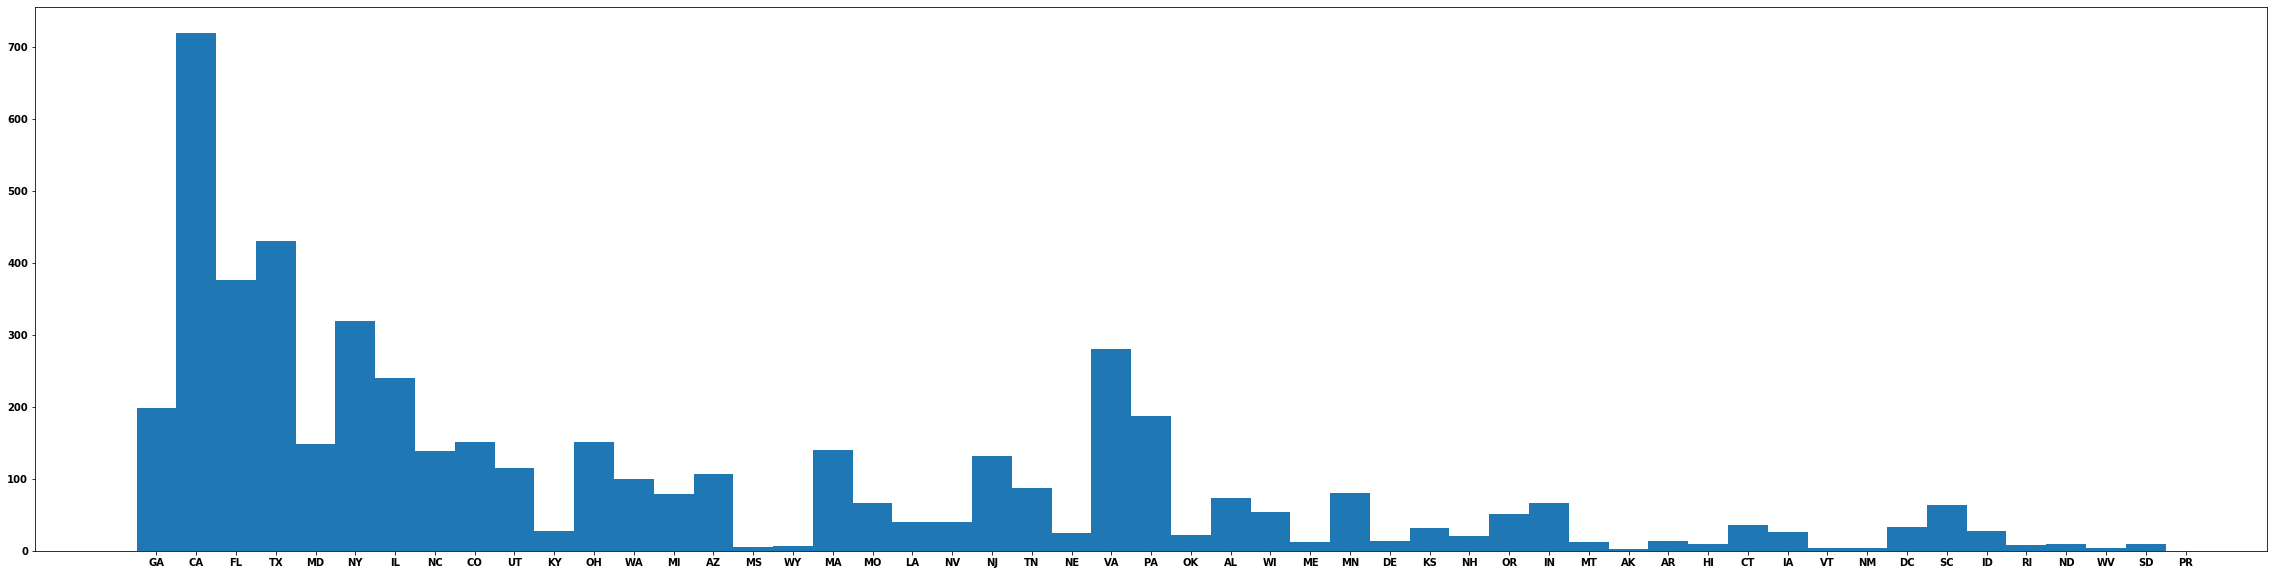

In [349]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 10))
counts, bins, bars = plt.hist(df['state_s'], bins=np.arange(52)-0.5)

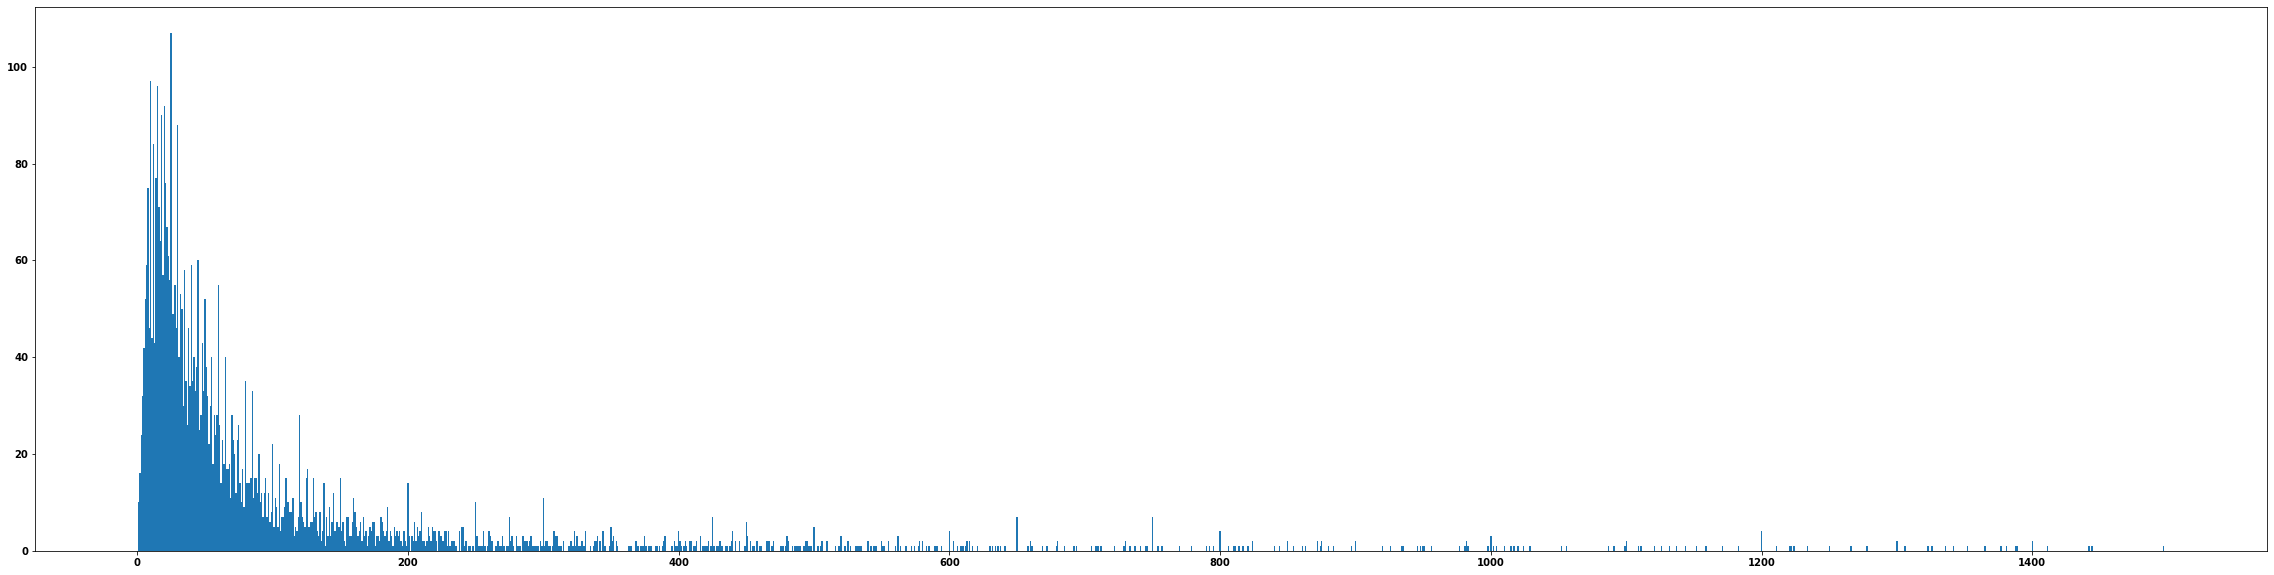

In [379]:
fig = plt.figure(figsize=(40, 10))
counts, bins, bars = plt.hist(df['workers'], bins=np.arange(1500)-0.5)

In [414]:
df.industry.value_counts(dropna=False)

Software                           551
Advertising & Marketing            454
Business Products & Services       453
Health                             351
Construction                       348
IT Management                      330
Consumer Products & Services       309
Financial Services                 265
Government Services                242
Real Estate                        192
Logistics & Transportation         167
Manufacturing                      150
Human Resources                    148
IT System Development              146
Retail                             139
Food & Beverage                    118
Energy                              92
Telecommunications                  90
Insurance                           84
Education                           80
Engineering                         70
Security                            62
Environmental Services              54
Travel & Hospitality                45
Media                               35
Computer Hardware        

In [438]:
undesireable_states = {'Florida':'FL', 
                         'Georgia':'GA', 
                         'South Carolina': 'SC',
                         'North Carolina': 'NC',
                         'Alabama':'AL',
                         'Mississippi': 'MS',
                         'Arkansas': 'AR',
                         'Louisiana': 'LA',
                         'Tennessee': 'TN',
                         'Kentucky': 'KY',
                         'Missouri': 'MO',
                         'West Virginia': 'WV'}

In [436]:
undesireable_industries=['Insurance', 'Media', 'Food & Beverage', 'Consumer Products & Services', 'Health', 'Advertising & Marketing', 'Human Resources']


In [442]:
#Get companies with 20 largest workforce in desireable industries and states

#Filter for companies in desired industries
desired_industries = df[~df['industry'].isin(undesireable_industries)]

#Filter for companies in desired states
most_workers_df = desired_industries[~desired_industries['state_s'].isin(undesireable_states.values())]

#Get rank of top 20 largest companies (by workers)
most_workers_indices = most_workers_df['workers'].nlargest(20).index

#Filter for 20 largest companies
top_20_filtered = most_workers_df[most_workers_df['rank'].index.isin(most_workers_indices)]

#Export to Excel
top_20_filtered.to_excel('top_20_companies.xlsx')
top_20_filtered

,inc5000companyId,inc5000yearId,rank,company,workers,previous_workers,ceo_gender,website,state_s,state_l,...,zipcode,founded,ifc_business_model,ifc_business_description,ifc_paid_business_description,ifc_verified_companyflag,raw_revenue,raw_revenue_previous,yrs_on_list,editorsPick
1262,23038,198409,1260,TaskUs,18400,7286,Male,taskus.com,CA,California,...,90405.0,2008,Works with venture backed companies that are l...,<p>Bryce Maddock and Jaspar Weir started TaskU...,<p>TaskUs provides next generation customer ex...,TRUE,359657529,0,8,NaN
1446,100453,199145,1444,MCI,2500,350,Male,http://mci.world,IA,Iowa,...,52240.0,2015,Runs a holding company consisting of tech-enab...,None,None,FALSE,64927135,0,2,NaN
1598,26331,199753,1596,United Shore Financial Services,4876,1878,Male,http://unitedshore.com,MI,Michigan,...,48341.0,1986,Provides mortgage lending services in the Unit...,<h2>WHY WE THINK WE'RE A GREAT PLACE TO WORK</...,None,FALSE,3178471301,0,6,NaN
2006,100842,201385,2004,PowerSchool,2400,1000,Male,powerschool.com,CA,California,...,95630.0,1997,Provides K-12 education technology products an...,None,None,FALSE,411296000,0,2,NaN
2044,21471,201537,2042,CrossCountry Mortgage,3076,1314,Male,crosscountrymortgage.com,OH,Ohio,...,44141.0,2003,"Offers a full range of home financing, refinan...",None,None,FALSE,624019179,0,7,NaN
2382,1344,202889,2380,22nd Century Technologies,2614,838,Male,tscti.com,VA,Virginia,...,22102.0,1997,"Provides IT consulting services to federal, st...",None,None,FALSE,258863117,0,12,NaN
2488,112089,203313,2486,Ensono,2245,969,Male,http://ensono.com,IL,Illinois,...,60515.0,2015,"Managed IT services provider, helping business...",None,None,FALSE,596093000,0,1,NaN
2699,280,204157,2697,Strike,4820,1954,Male,Strikeusa.com,TX,Texas,...,77380.0,2003,Oversees a full range of integrated engineerin...,None,None,FALSE,1785409000,0,11,NaN
2720,88968,204241,2718,Kodiak Building Partners,2793,985,Male,kodiakbp.com,CO,Colorado,...,80129.0,2011,Creates and manages a platform of diverse and ...,None,None,FALSE,1256385174,0,3,NaN
2954,105637,205177,2952,Samasource,2750,755,Female,samasource.com,CA,California,...,94110.0,2008,"Delivers secure, high-quality training data an...",None,None,FALSE,24645423,0,1,NaN


In [431]:
#Editors picks in "desireable" states
editors_picks = df[df['editorsPick'].notnull()]
editors_picks = editors_picks[~editors_picks['state_s'].isin(undesireable_states.values())]
editors_picks.to_excel('editors_picks.xlsx')
editors_picks


,inc5000companyId,inc5000yearId,rank,company,workers,previous_workers,ceo_gender,website,state_s,state_l,...,zipcode,founded,ifc_business_model,ifc_business_description,ifc_paid_business_description,ifc_verified_companyflag,raw_revenue,raw_revenue_previous,yrs_on_list,editorsPick
1,102526,193365,2,Create Music Group,125,10,Male,createmusicgroup.com,CA,California,...,90028.0,2015,Operates an independent American music distrib...,None,None,FALSE,62182000,0,1,[The Top 10]
4,112053,193377,5,ZULIE VENTURE INC,3,1,Male,http://CELLPAY.US,TX,Texas,...,77477.0,2016,Runs an authorized national payment center tha...,None,None,FALSE,49100047,0,1,[The Top 10]
5,109169,193381,6,Hunt A Killer,59,3,Male,http://huntakiller.com,MD,Maryland,...,21230.0,2016,Provides interactive entertainment experiences...,None,None,FALSE,27324043,0,1,[The Top 10]
6,87448,193385,7,Case Energy Partners,26,3,Male,http://caseenergypartners.com,TX,Texas,...,75206.0,2012,Acquires oil and gas mineral rights and royalt...,None,None,FALSE,41335633,0,3,"[The Top 10, Repeat Honorees]"
7,100190,193389,8,Nationwide Mortgage Bankers,500,10,Male,nmbnow.com,NY,New York,...,11747.0,2011,Assists in the home mortgage financing and ref...,None,None,FALSE,76574593,0,2,"[The Top 10, Repeat Honorees]"
8,107625,193393,9,Paxon Energy,164,1,Female,http://paxonengineering.com,CA,California,...,94588.0,2015,"Assists clients in the oil, gas, and utilities...",None,None,FALSE,22110329,0,1,"[The Top 10, Women Leaders]"
9,102891,193397,10,Inspire11,58,3,Male,https://www.inspire11.com/,IL,Illinois,...,60601.0,2016,"Specializes in agile transformation, data scie...",None,None,FALSE,22641262,0,1,[The Top 10]
11,36632,193405,12,TRYFACTA,451,34,Male,http://tryfacta.ai,CA,California,...,94588.0,1996,"Provides cloud, mobility, and big-data service...",None,None,FALSE,42794215,0,2,[Repeat Honorees]
14,19484,193417,15,Resource Innovations,45,2,Female,http://resource-innovations.com,CA,California,...,94019.0,2016,Provides environmental consulting services tha...,None,None,FALSE,27607738,0,2,[Women Leaders]
15,100161,193421,16,NuLeaf Naturals,52,2,Male,https://nuleafnaturals.com/,CO,Colorado,...,80202.0,2014,Offers organic hemp oil extracts to all 50 sta...,None,None,FALSE,31330234,0,2,[Repeat Honorees]
